# Online Shoppers Purchasing Intention Dataset

### TO DO

1. A PowerPoint explaining the ins and outs of the problem, your thoughts on the asked question, the different variables you created, how the problem fits in the context of the study, etc: 25%.
2. A code in python: \
a) **Data pre-processing**: encoding, normalization, imputation… 20%. \
b) **Data visualization** (use matplotlib, seaborn, bokeh ...): show the link between the variables and the target: 20%. \
c) **Modeling**: use the scikit-learn library to try several algorithms, change the hyper parameters, do a grid search, compare the results of your models using graphics: 20%
3. Transformation of the model into an API of your choice (Django or flask): 5%.
4. Bonus : 10%

### Due at the end

1. Put your work on your GitHub account:
a) A readme summarizing the task to be accomplished and your conclusions.
b) The pdf version of your PowerPoint.
c) The code in Jupyter notebook format.
d) The Django or Flask API.
2. Put the link to your GitHub on the following page:
https://docs.google.com/spreadsheets/d/1kaQUR8rA9Kbk93ZPM5Blid9pjfM6BZts6I6Odhr8Efc/edit?usp=sharing
3. Send an email to your teacher that you had in class, with:
a) Subject: "ESILV - Python for data analysis - project 2023/2024".
b) Content:
▪ Last name / first name
▪ GitHub link
c) attached file: Ppt (the same as on GitHub).

### Dataset Information
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

### Git bash:
- git add file
- git coomit -m "Commentaire"
- git push

## IMPORTS

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

## DATA LOADING

In [129]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## VARIABLES EXPLANATION :

As we now have a little view on our data, here is a presentation of each columns so we can already understand what we are talking about. 


- `Administrative`, `Informational`, `ProductRelated` : number of different types of pages visited by the visitor in that session.

        - Administrative pages could include pages like account management, contact pages, or help sections.
        - Informational pages could include terms of service, privacy policy, or product information pages.
        - Product-related pages usually involve browsing specific products or categories.
        

- `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration` : total time spent in each of these page categories.


- `BounceRates` : refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. A higher bounce rate might indicate that visitors are not finding what they are looking for.


- `ExitRates` : For all pageviews to the page, Exit Rate is the percentage that were the last in the session.


- `PageValues` : represents the average value for a web page that a user visited before completing an e-commerce transaction. This value is intended to give you an idea of which page in your site contributed more to your site's revenue. (float : i.e. $100.5).


- `SpecialDay` : indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day, promotional event) in which the sessions are more likely to be finalized with transaction.The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.


- `Month` : Represents the month of the year during which the online interaction occurred.


- `OperatingSystems` : OS of the visitor (int value).


- `Browser` : Browser of the visitor (int value).


- `Region` : the region of the started session.


- `TrafficType` : Source before the website ex: Link, Ad...


- `VisitorType` : 'New Visitor', 'Returning Visitor' and 'Other'.


- `Weekend` : boolean value indicates whether the date of the visit is weekend.


- `Revenue` : boolean value indicates whether the visit has been finalized by a transaction.

*For more information :*

`BounceRates`, `ExitRates` and `PageValues` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site, for more details check : 
- https://support.google.com/analytics/answer/2695658?hl=en 
- https://support.google.com/analytics/answer/2525491?hl=en&sjid=10687907467968608279-NC

## Data pre-processing

First, we decided to change the type of categorical variables for whom the type is numerical to facilitate visualization and also to round to 2 float variables.

Then, we also replace false and True by 0 or 1 for the 2 bool variables : `Revenue` and `Weekend`.

Finaly,  we create 3 variables from the 3 category of `VisitorType`. In fact, when for example the visitor is a New one, the variable `New_Visitor` takes 1 and else 0.

Still, we kept `VisitorType` for visualization, but for prediction it will be exclude.

In [70]:
df['OperatingSystems'] = df['OperatingSystems'].astype(str)
df['Browser'] = df['Browser'].astype(str)
df['Region'] = df['Region'].astype(str)
df['TrafficType'] = df['TrafficType'].astype(str)
df['SpecialDay'] = df['SpecialDay'].astype(str)



In [71]:
df['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})

In [72]:
df = df.round({'ProductRelated_Duration': 2, 'ProductRelated_Duration': 2, 
               'ExitRates': 2,'PageValues':2,'BounceRates':2})

In [73]:
# Did this because we want to keep the original VisitorType for visualization

df['visitortype'] = df['VisitorType'].copy()


In [74]:
df = pd.get_dummies(df, columns=['visitortype'], prefix='')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,_New_Visitor,_Other,_Returning_Visitor
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,0,0,0,0,1
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,0,0,0,0,1
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,0,0,0,0,1
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,0,0,0,0,1
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,1,0,0,0,1


*We change again the types because these don't match with their meanings*

In [75]:
df['Revenue'] = df['Revenue'].astype(str)
df['_New_Visitor'] = df['_New_Visitor'].astype(str)
df['_Other'] = df['_Other'].astype(str)
df['_Returning_Visitor'] = df['_Returning_Visitor'].astype(str)
df['Weekend'] = df['Weekend'].astype(str)


In [76]:
# J'aurai drop ces colonnes car on ne sait pas à quoi correspondent ces valeurs 
#(j'ai pas reussi à trouver sur internet un tableau qu'on pourrait mapper)
#df = df.drop(columns=['OperatingSystems','Browser','Region','TrafficType'])

Sinon pour la partie pre-processing je pense qu'il faut utiliser sklearn.preprocessing / sklearn.impute pour l'encoding et imputation (cours 4) (on aura surement pas besoin d'utiliser sklearn.impute car on n'a pas de données manquantes). A voir ce qu'il est le plus adapté par rapport à ce qu'on va faire dans la partie modeling
On pourrait encoder VisitorType (?), Revenue et Weekend comme ce sont des boolean

For the first variables, corresponding to administrative/informational related variables i think there is no interest to visualize them alone because these are only number of pages visitated each time.

## Data visualization

**Variables statistics :**

In [77]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746230,0.022103,0.042975,5.889238
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669282,0.048593,0.048764,18.568405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.010000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.935000,0.000000,0.030000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157500,0.020000,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.520000,0.200000,0.200000,361.760000


In [78]:
for column in df.select_dtypes(include='object').columns:
    print(f"Frequency for {column}:")
    print(df[column].value_counts())
    print()

Frequency for SpecialDay:
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Frequency for Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Frequency for OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Frequency for Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Frequency for Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Frequency for TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      1

In [79]:
df.describe(include="object")

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,_New_Visitor,_Other,_Returning_Visitor
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
unique,6,10,8,13,9,20,3,2,2,2,2,2
top,0.0,May,2,2,1,2,Returning_Visitor,0,0,0,0,1
freq,11079,3364,6601,7961,4780,3913,10551,9462,10422,10636,12245,10551


After we did a statistic description of our object variables, we can see that there is :
    
    - 10 values for months, which means that 2 monts are missing, 
    so surely later in our studies we will identify them and give a reason for that.
    
    - 3 categories of visitors.
    
    - 6 of special days
    
    - 8, 13, 9 and 20 for respectivly "OperatingSystems", "Browser", "Region", and "TrafficType".

**Graphic visualization :**

In [80]:
SpecialDay_counts = df['SpecialDay'].value_counts()

colors = ['lightgreen','lightblue', 'green']


fig = go.Figure(data=[go.Pie(labels=SpecialDay_counts.index, values=SpecialDay_counts,
                             marker=dict(colors=colors),title='Special Day distribution')])
fig.show()

The interst of visualizing the monthly distribution of visitors is first that we can see what are the missing months. January and april. We still don't know why but we will figure it out later with more information.

Then the Top 4 months with most people in the website are **May**, **November**, **March** and **December**.

For November and December we can respectfully assume that maybe it's thanks to the blackfriday and christmas.

In [81]:
month_to_num = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
num_to_month = {v: k for k, v in month_to_num.items()}
# Apply the mapping and sort
month_counts = df['Month'].value_counts()
month_counts.index = pd.Index([month_to_num[month] for month in month_counts.index])
month_counts = month_counts.sort_index()
print(month_counts)
month_counts.index = pd.Index([num_to_month[month] for month in month_counts.index])
month_counts = pd.DataFrame(month_counts)
print(month_counts)

2      184
3     1907
5     3364
6      288
7      432
8      433
9      448
10     549
11    2998
12    1727
Name: Month, dtype: int64
      Month
Feb     184
Mar    1907
May    3364
June    288
Jul     432
Aug     433
Sep     448
Oct     549
Nov    2998
Dec    1727


In [82]:
month_counts.reset_index(inplace=True)

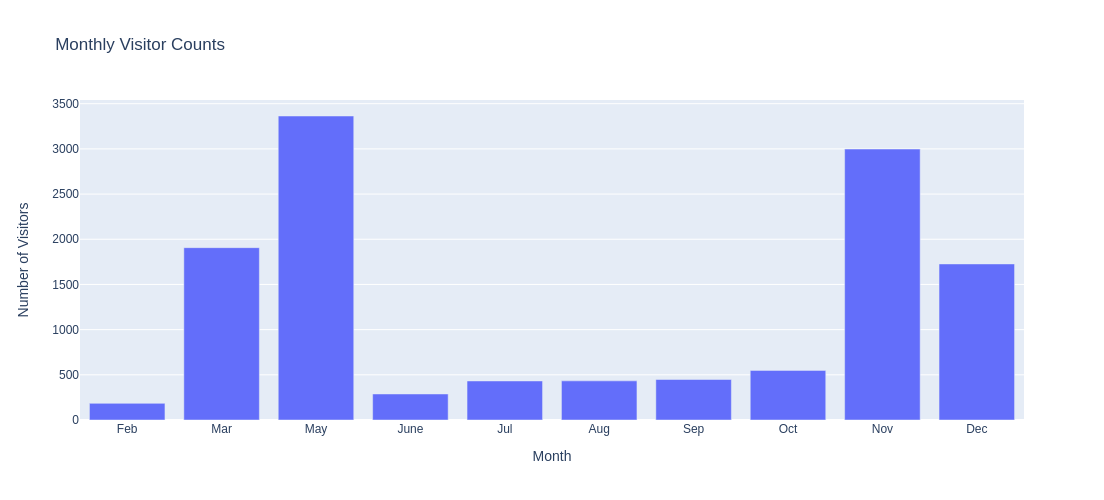

In [85]:
month_counts.columns = ['Month', 'Count']

fig = px.bar(month_counts, x='Month', y='Count', title='Monthly Visitor Counts')
fig.update_layout(width=500,height=500,yaxis_title='Number of Visitors')
fig.show()

With this first view of the data, espacially of the distribution among categories, we see clearly that the majority of people visitating the website are Returning visitors. So these are people who have already visiting the sigte at least once. 

Then we have the New_visitors whom only represent 14%  and then the others with less than 1%.

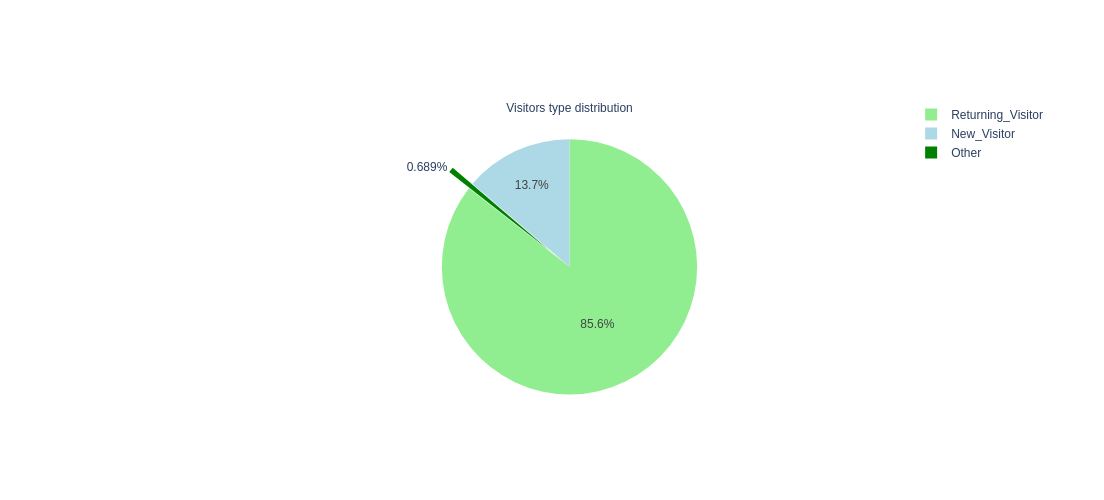

In [86]:
VisitorType_counts = df['VisitorType'].value_counts()

colors = ['lightgreen','lightblue', 'green']
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=VisitorType_counts.index, values=VisitorType_counts, pull=[0, 0, 0.2, 0],
                             marker=dict(colors=colors),title='Visitors type distribution')])
fig.update_layout(width=500,height=500)
fig.show()

In [89]:
Weekend_counts = df['Weekend'].value_counts()

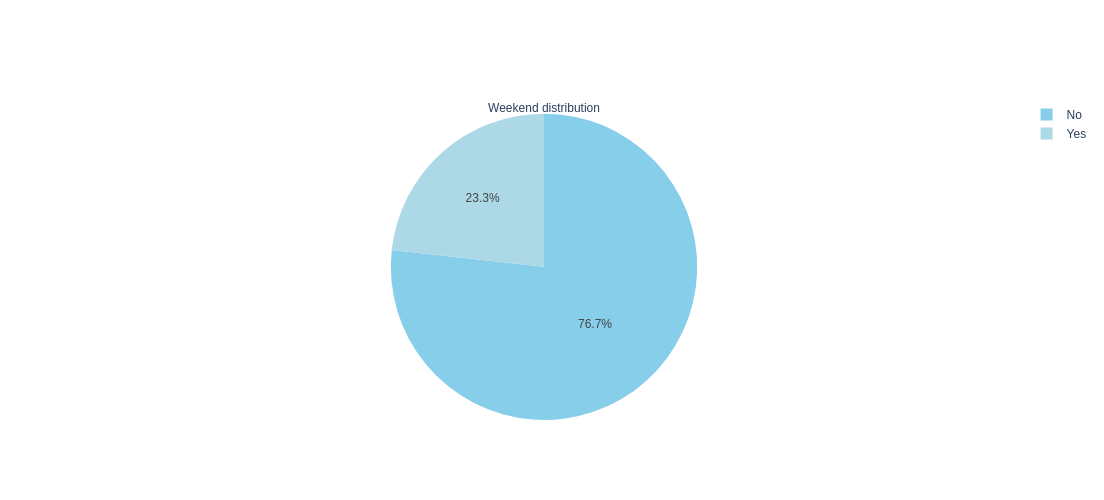

In [90]:
colors = ['skyblue','lightblue']

fig = go.Figure(data=[go.Pie(labels=Weekend_counts.index.map({'1': 'Yes', '0': 'No'}), 
                             values=Weekend_counts, marker=dict(colors=colors),
                             title='Weekend distribution')])
fig.update_layout(width=500,height=500)
# Show the plot
fig.show()

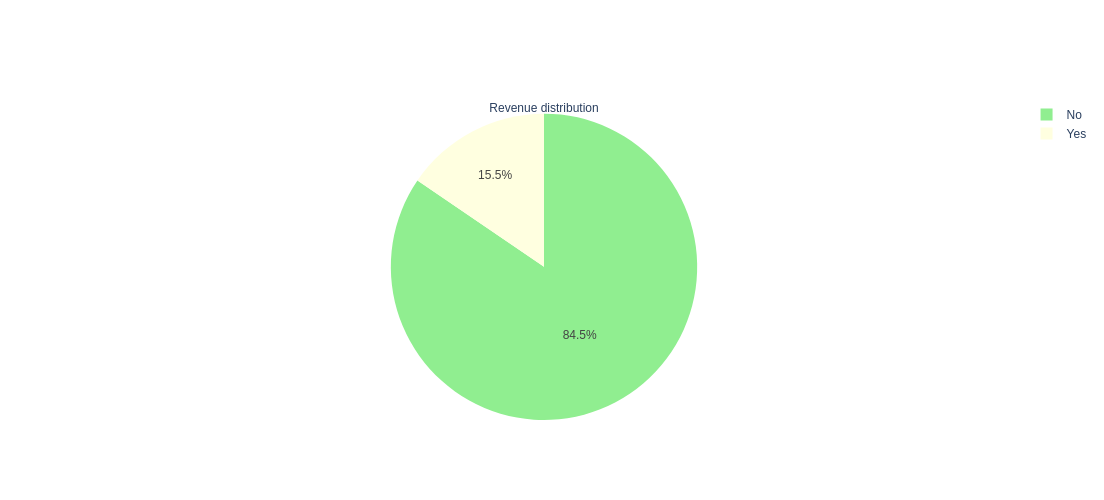

In [91]:
Weekend_counts = df['Revenue'].value_counts()

colors = ['lightgreen','lightyellow']

fig = go.Figure(data=[go.Pie(labels=Weekend_counts.index.map({'1': 'Yes', '0': 'No'}), 
                             values=Weekend_counts, marker=dict(colors=colors),
                             title='Revenue distribution')])
fig.update_layout(width=500,height=500)
# Show the plot
fig.show()

## 2 VARIABLES STUDIES  

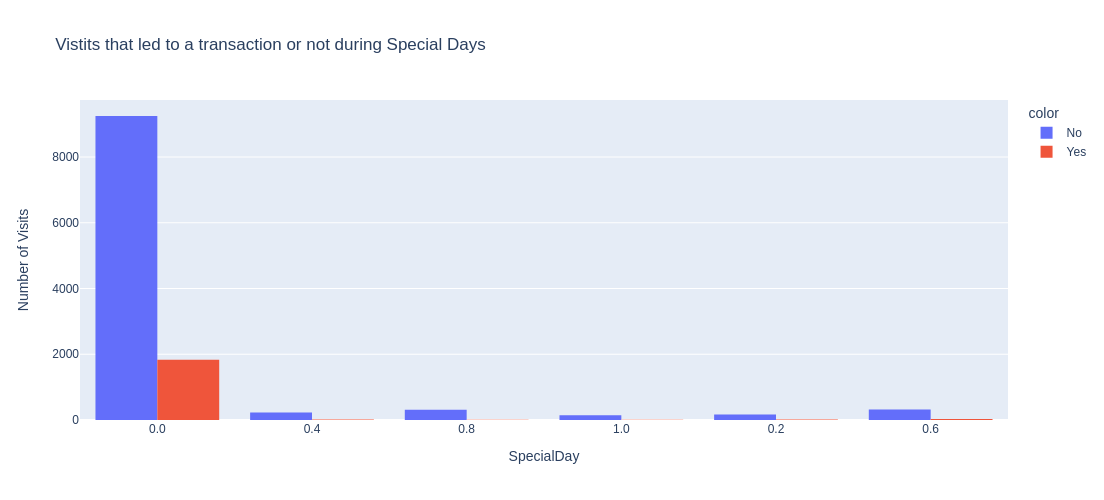

In [92]:
fig = px.histogram(df, x="SpecialDay", color=df['Revenue'].map({'1': 'Yes', '0': 'No'}), barmode='group',
                    title='Vistits that led to a transaction or not during Special Days')
fig.update_layout(yaxis_title='Number of Visits',width=500,height=500)
fig.show()

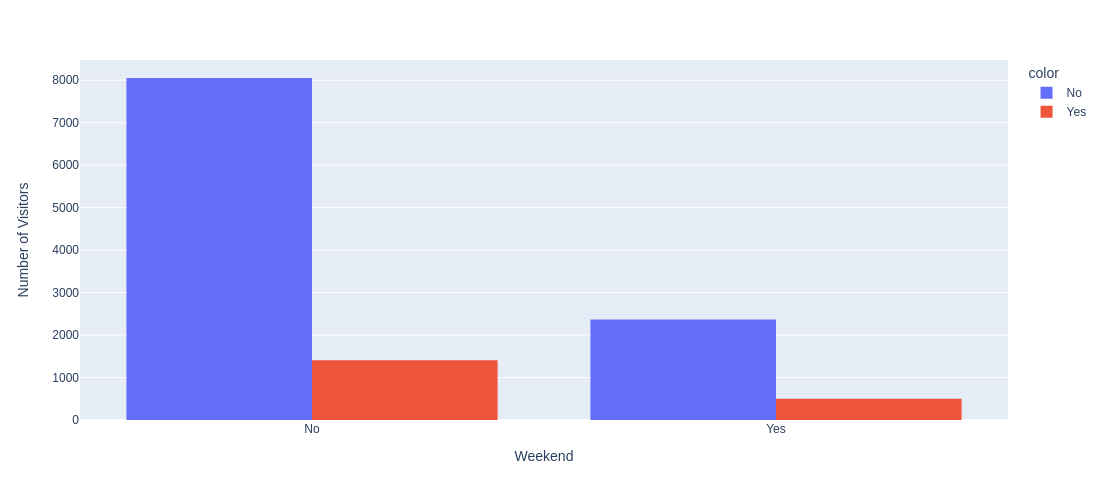

In [93]:
fig = px.histogram(df, x=df['Weekend'].map({'1': 'Yes', '0': 'No'}), color=df['Revenue'].map({'1': 'Yes', '0': 'No'}), barmode='group',
                   title='')
fig.update_layout(yaxis_title='Number of Visitors',
                  xaxis_title='Weekend',width=500,height=500)
fig.show()

There are more visits overall that do not result in a transaction, and there is not necessarily a link between the period ( during the week or at the weekend) and transactions

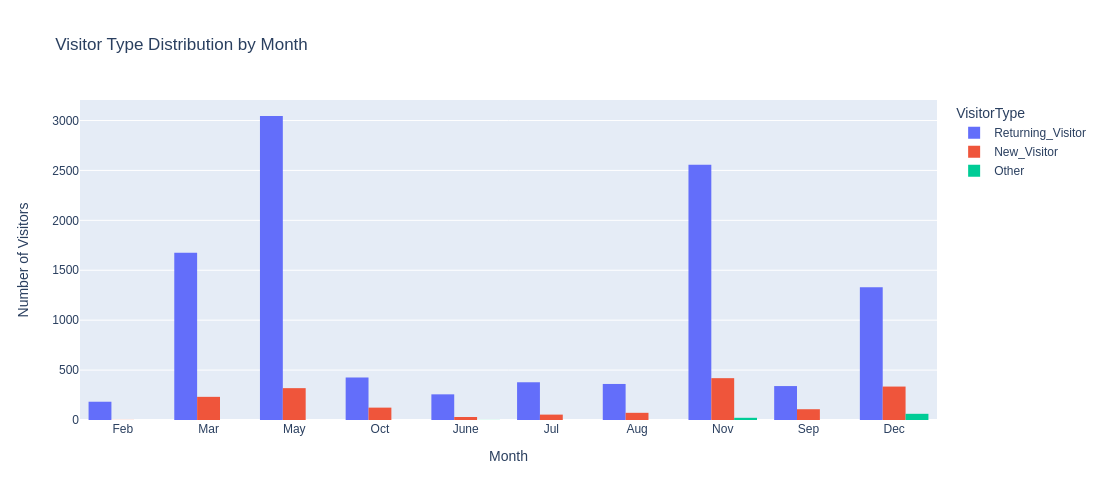

In [94]:
fig = px.histogram(df, x="Month", color='VisitorType', barmode='group',
                   title='Visitor Type Distribution by Month')
fig.update_layout(yaxis_title='Number of Visitors',width=1000,height=500)
fig.show()


Revenue               0     1
VisitorType                  
New_Visitor        1272   422
Other                69    16
Returning_Visitor  9081  1470


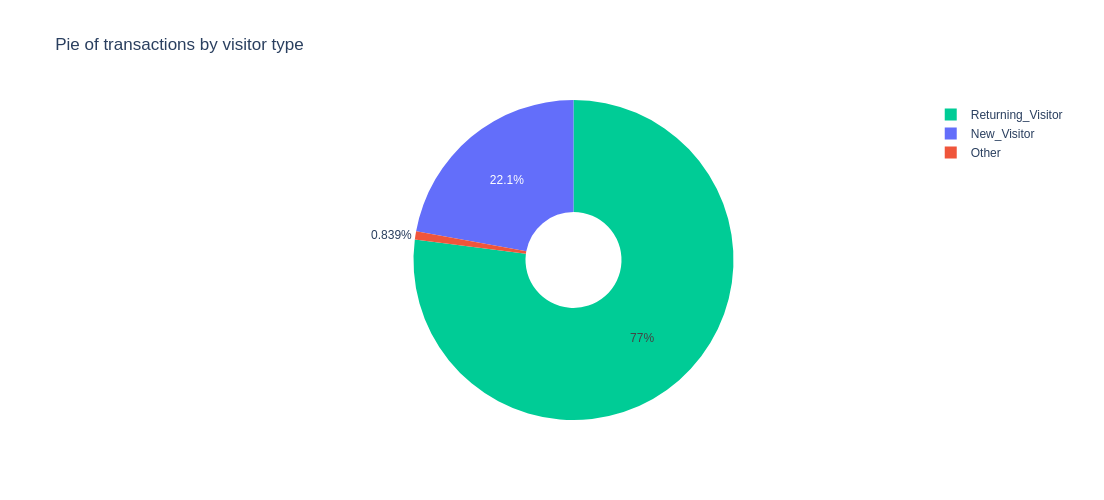

In [105]:
grouped_df = df.groupby(['VisitorType', 'Revenue']).size().unstack()

print(grouped_df)
# Define colors
colors = sns.color_palette('pastel')[2:5]

# Create a Pie chart using plotly.express
fig = px.pie(names=grouped_df.index,
             values=grouped_df["1"],
             #color=grouped_df.index,
             color=colors,
             hole=0.3,
             title="Pie of transactions by visitor type",
             )
fig.update_layout(width=500,height=500)
# Show the plot
fig.show()


New Visitor buy a bit more

In [98]:
grouped_vt_r_df = df.groupby(['VisitorType','Revenue']).size().unstack()

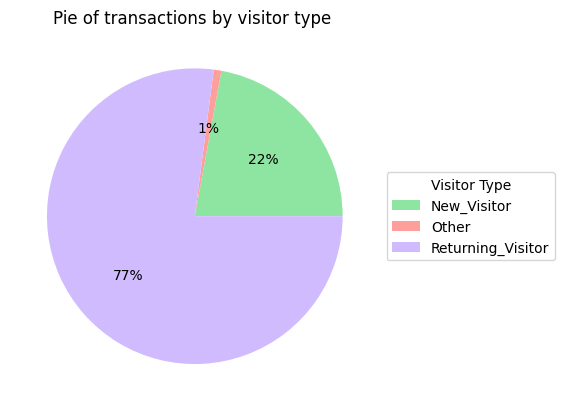

In [100]:
colors = sns.color_palette('pastel')[2:5]

fig, ax = plt.subplots()
wedges,_,_ = ax.pie(grouped_vt_r_df["1"], colors = colors, autopct='%.0f%%')
ax.legend(wedges,
          grouped_vt_r_df.index,
          title="Visitor Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Pie of transactions by visitor type ")
plt.show()

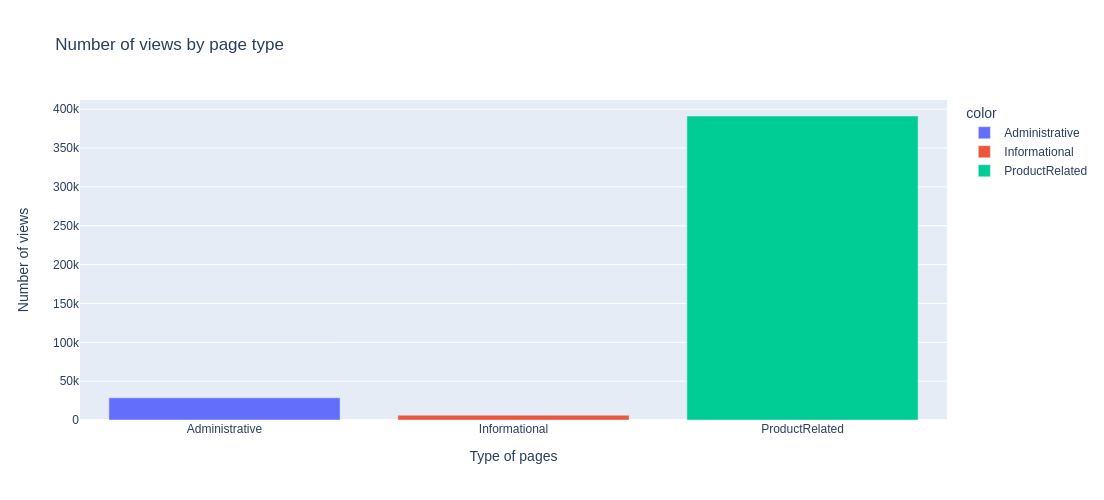

In [107]:
fig = px.bar(x=pages_df.columns, y=pages_df.sum(axis=0), labels={"x": "Type of pages", "y": "Number of views"},
             title="Number of views by page type",  color=pages_df.columns)
fig.update_layout(width=500,height=500)
fig.show()

In [189]:
# A VOIR, PAS ENCORE FAIT LES INTERPRET AU CAS OU ON NE LES GARDE PAS 

fig = px.box(df, x="VisitorType", y="Administrative",
             labels={"VisitorType": "Visitor Type", "Administrative": "Number of Administrative Pages"},
             title="Distribution of Administrative Pages by Visitor Type",
             color="VisitorType",
             color_discrete_map={"New Visitor": "skyblue", "Returning Visitor": "lightgreen", "Other": "lightcoral"})
fig.update_layout(width=1000,height=500)
fig.show()


This graph show us for each visitorType, the number of visit for each number of informational pages

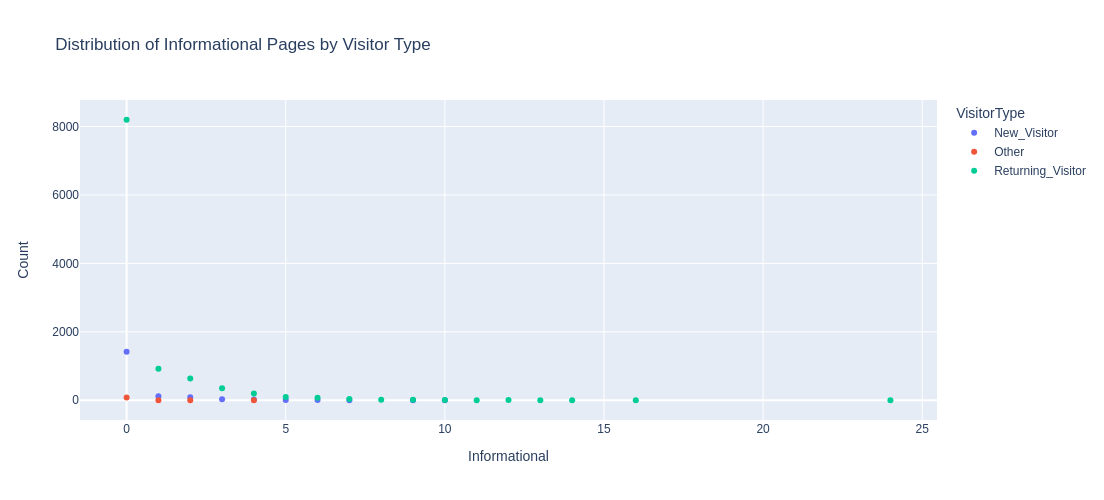

In [108]:
fig = px.scatter(df.groupby(["VisitorType", "Informational"]).size().reset_index(name="Count"),
                 x="Informational", y="Count", color="VisitorType",
                 labels={"x": "Number of Informational Pages", "y": "Number of Visitors", "color": "Visitor Type"},
                 title="Distribution of Informational Pages by Visitor Type")
fig.update_layout(width=1000,height=500)
fig.show()



In [191]:
fig = px.box(df, x="VisitorType", y="ProductRelated",
                labels={"VisitorType": "Visitor Type", "ProductRelated": "Number of Product-Related Pages"},
                title="Distribution of Product-Related Pages by Visitor Type",
                color="VisitorType",
                color_discrete_map={"New Visitor": "skyblue", "Returning Visitor": "lightgreen", "Other": "lightcoral"})

fig.show()


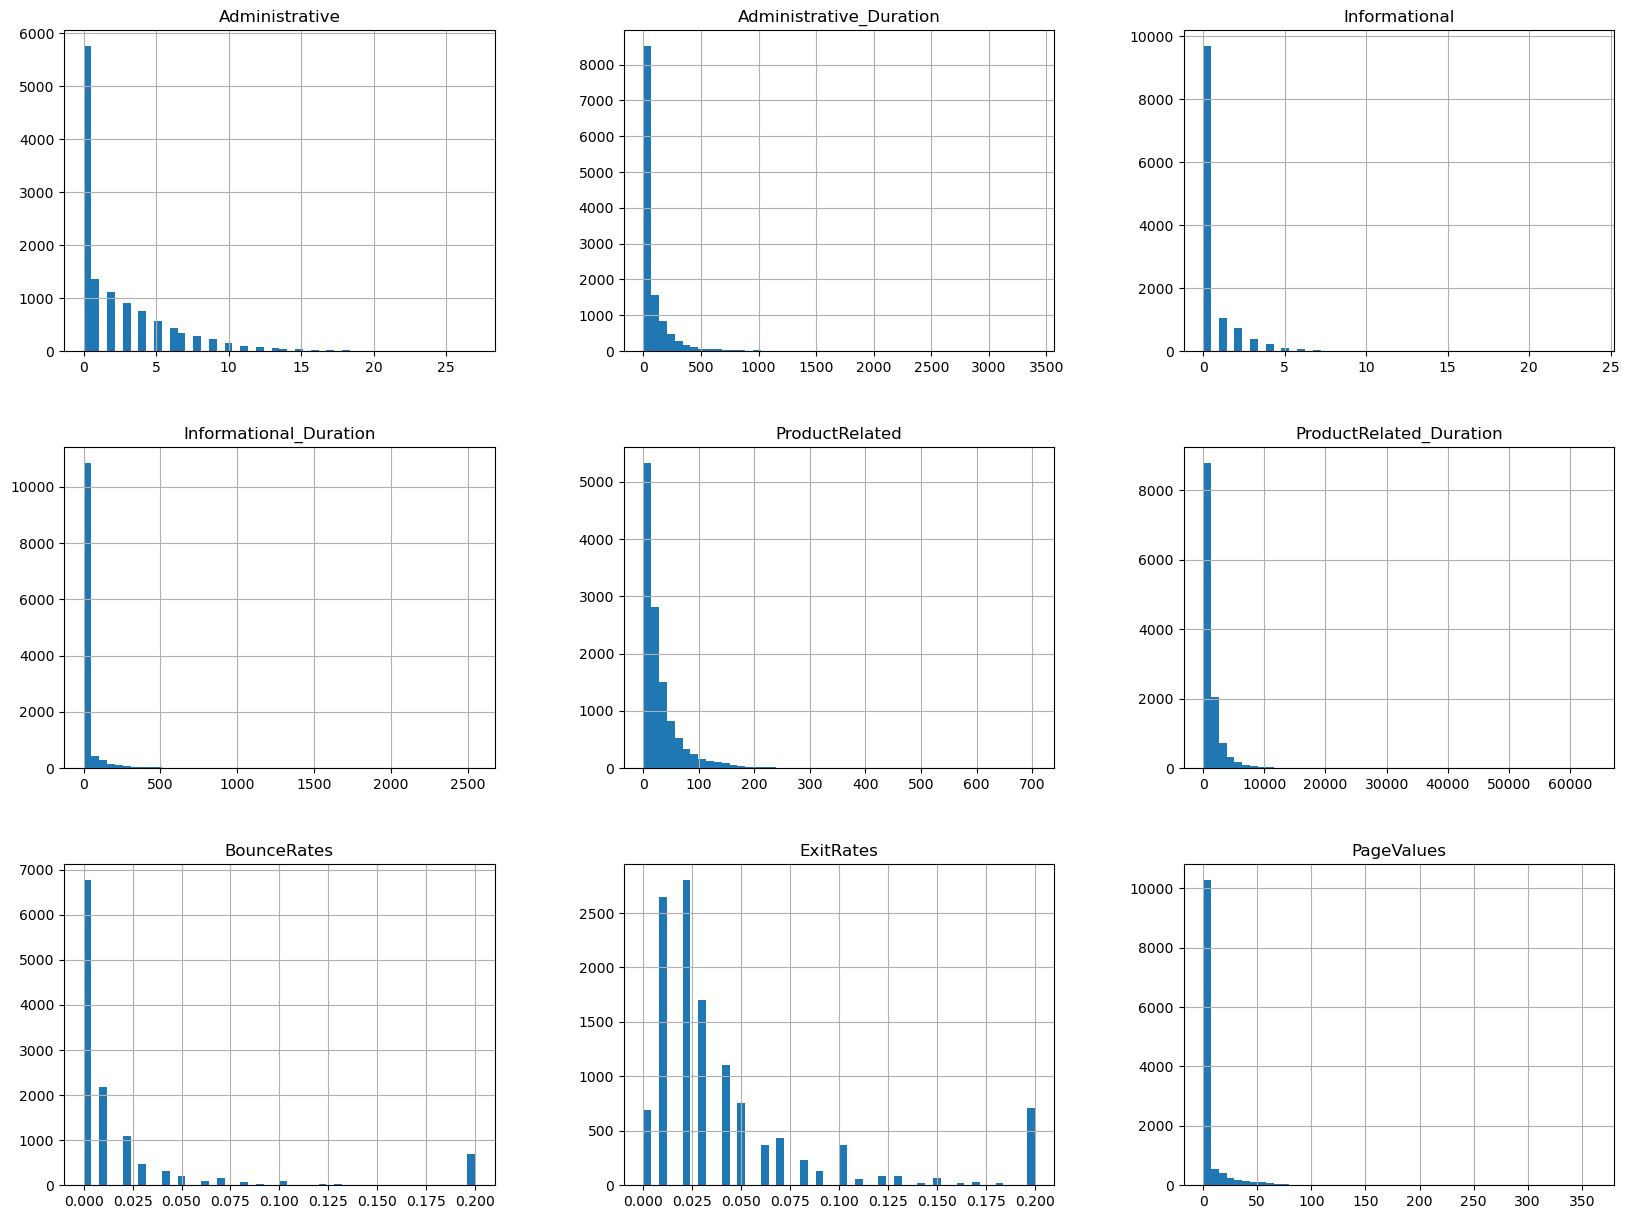

In [172]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [193]:
correlations = df.corr()

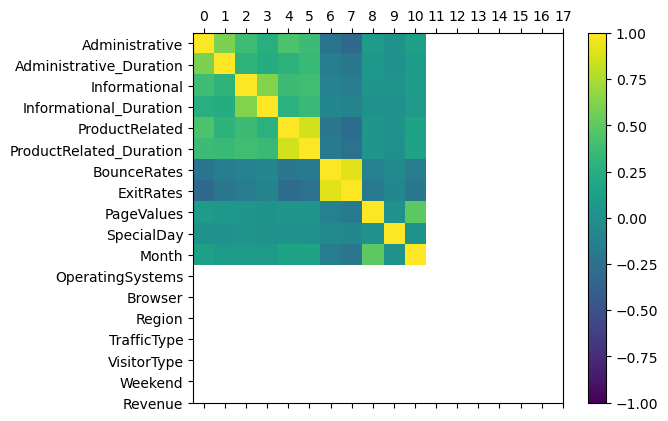

In [61]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
names= df.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(names)
plt.show()

In [194]:
## L'equivalent de celui d'au dessus en plotly :)

fig = sp.make_subplots(rows=1, cols=1, subplot_titles=["Correlation Matrix"])

heatmap = go.Heatmap(z=correlations.values,
                    x=correlations.columns,
                    y=correlations.index,
                    colorscale="Viridis")

fig.add_trace(heatmap, row=1, col=1)

fig.update_layout(title_text="Correlation Matrix",
                  xaxis=dict(ticks=""),
                  yaxis=dict(ticks="", tickvals=list(range(len(correlations.index))), ticktext=correlations.index),
                  coloraxis_colorbar=dict(title="Correlation"))

fig.show()

## Pre processing

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler

def convert_bool_to_int(df):
    for column in df.select_dtypes(include=['bool']).columns:
        df[column] = df[column].astype(int)
    return df

bool_to_int_transformer = FunctionTransformer(convert_bool_to_int)

# Custom transformer for month conversion
def convert_month(df):
    df['Month'] = df['Month'].map(month_to_num)
    return df

month_converter = FunctionTransformer(convert_month)

# Defining the ColumnTransformer for different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['VisitorType']),
        ('bool', bool_to_int_transformer, list(df.select_dtypes(include=['bool']).columns)),
        ('month', month_converter, ['Month']),
        ('scaler', RobustScaler(), ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "PageValues"])
    ],
    remainder='passthrough'  # Keep other columns untouched
)

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans),
])


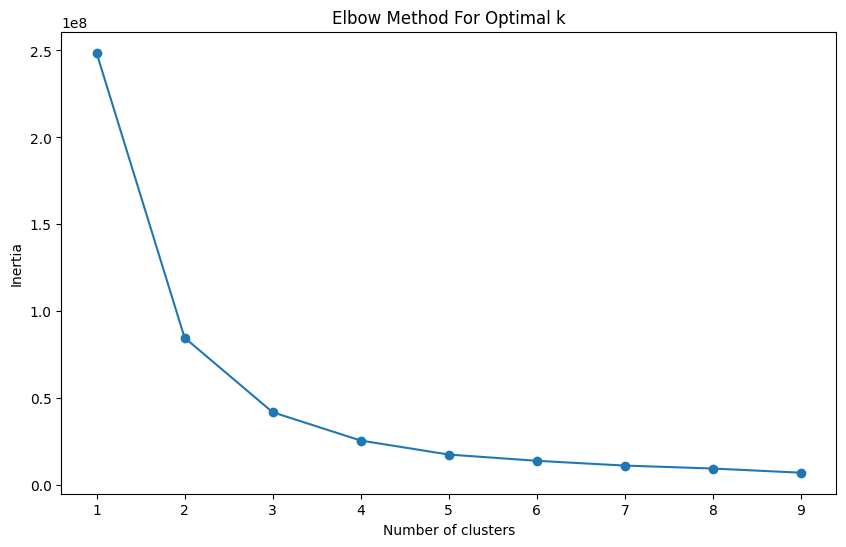

In [145]:
inertia = []
K_range = range(1, 10)  # Adjust the range as needed

for k in K_range:
    # Update the number of clusters in KMeans
    pipeline.set_params(kmeans__n_clusters=k)
    
    # Fit the pipeline to the data
    pipeline.fit(df)
    
    # Record the inertia
    inertia.append(pipeline.named_steps['kmeans'].inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [146]:
pipeline.fit_transform(df)


array([[   6.29060486,  718.15240039,  238.5825747 , ..., 2202.94113097,
        1034.78293078,   69.39343386],
       [   6.28479571,  718.15220257,  238.58214009, ..., 2202.94075305,
        1034.78275069,   69.39277974],
       [   6.29060486,  718.15240039,  238.5825747 , ..., 2202.94113097,
        1034.78293078,   69.39343386],
       ...,
       [   4.58877528,  718.12800798,  238.524018  , ..., 2202.92759513,
        1034.7647145 ,   69.13230731],
       [   4.46510126,  718.12492865,  238.51522499, ..., 2202.92147478,
        1034.76223143,   69.1201922 ],
       [   4.76268518,  718.12970245,  238.5283777 , ..., 2202.92900838,
        1034.76609411,   69.1386909 ]])

In [140]:
import copy
k=3
pipeline.set_params(kmeans__n_clusters=k)
pipeline.fit(df)

cluster_labels = pipeline.predict(df)

# Add the cluster labels to your DataFrame
final_df = copy.deepcopy(df)
final_df['Cluster'] = cluster_labels
final_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [141]:
final_df['Cluster'].value_counts()

0    11641
1      573
2      116
Name: Cluster, dtype: int64

In [142]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_transformed_data = pca.fit_transform(final_df)
plt.yscale("log")
plt.xscale("log")
plt.scatter(pca_transformed_data[:,0],pca_transformed_data[:,1],s=2)
plt.show()
print(sum(pca.explained_variance_ratio_))
print(pca.get_covariance())

ValueError: could not convert string to float: 'Feb'

In [ ]:
!pip install shapash
from shapash import SmartExplainer
xpl = SmartExplainer(
  model=regressor,
  features_dict=house_dict,  # Optional parameter
  preprocessing=encoder, # Optional: compile step can use inverse_transform method
  postprocessing=postprocess, # Optional: see tutorial postprocessing  
)